In [1]:
import requests
import io
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from tqdm.notebook import tqdm
from matplotlib import ticker
plt.rcParams['font.family'] = 'Arial Unicode MS'

/Users/hoover/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
data_readexcel = pd.read_excel('/Users/hoover/Documents/Github/TW Stock/TW_Stock_LTprice.xlsx',index_col=0 ,sheet_name=None)
data = data_readexcel
data

{'20230103':           成交股數   成交筆數        成交金額     開盤價     最高價     最低價     收盤價  漲跌價差  \
 證券代號                                                                      
 0050  15272877  13899  1673263794  109.60  110.90  108.45  110.75  0.55   
 0051     59406    148     3033756   51.25   51.50   50.80   51.40  0.15   
 0052    284445    403    26319413   92.00   93.50   91.40   93.30  0.80   
 0053      7014   1006      361840   51.70   52.35   51.40   52.35  0.95   
 0055     92843    307     1984374   21.46   21.52   21.23   21.49  0.01   
 ...        ...    ...         ...     ...     ...     ...     ...   ...   
 9944     73177     54     1487980   20.40   20.40   20.15   20.30  0.15   
 9945   5628497   4272   242191591   43.20   43.55   42.35   43.55  0.30   
 9946     10003     13      121606   12.20   12.20   12.15   12.15  0.05   
 9955    252042    246     5086427   19.90   20.50   19.85   20.40  0.60   
 9958   3192107   2311   289151931   89.50   91.70   88.80   90.90  2.30   


In [36]:
stock = '0050'

In [37]:
q_shares = pd.DataFrame({a:b.loc[[stock],'成交股數'] for a,b in data.items()}).transpose()
open = pd.DataFrame({a:b.loc[[stock],'開盤價'] for a,b in data.items()}).transpose()
high = pd.DataFrame({a:b.loc[[stock],'最高價'] for a,b in data.items()}).transpose()
low = pd.DataFrame({a:b.loc[[stock],'最低價'] for a,b in data.items()}).transpose()
close = pd.DataFrame({a:b.loc[[stock],'收盤價'] for a,b in data.items()}).transpose()
df = pd.concat([q_shares, open, high, low, close], axis=1)
df.columns = ['成交股數', 'Open', 'High', 'Low', 'Close']
df["Return"]=df["Close"].pct_change()
df.index = pd.to_datetime(df.index)
df.head()

,成交股數,Open,High,Low,Close,Return
2023-01-03,15272877,109.60,110.9,108.45,110.75,NaN
2023-01-04,14211742,110.30,110.8,110.10,110.50,-0.002257
2023-01-05,12395862,111.25,111.7,110.95,111.30,0.007240
2023-01-06,11826560,111.20,112.2,111.15,111.80,0.004492
2023-01-09,15649173,114.00,115.8,113.90,115.80,0.035778


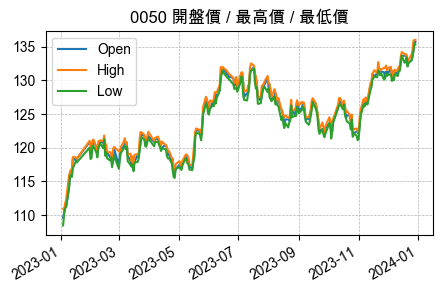

In [38]:
df[['Open', 'High', 'Low']].plot(figsize=(5,3))
plt.title(stock + ' 開盤價 / 最高價 / 最低價')
plt.grid(linestyle='--', linewidth=0.5)
plt.show()

In [39]:
df['Close_y'] = df["Close"].shift(1)
df['Open-Low'] = round((df['Low'] - df['Open']) / df['Open'], 5)
df['High-Open'] = round((df['High'] - df['Open']) / df['Open'], 5)
#df['range'] = round((df['High'] - df['Low']) / df['Open'], 5)
df['Close_y-Low'] = round((df['Low'] - df['Close_y']) / df['Close_y'], 5)
df['High-Close_y'] = round((df['High'] - df['Close_y']) / df['Close_y'], 5)
df.drop(df.index[0], inplace=True)
df.index = pd.to_datetime(df.index)
df

,成交股數,Open,High,Low,Close,Return,Close_y,Open-Low,High-Open,Close_y-Low,High-Close_y
2023-01-04,14211742,110.30,110.8,110.10,110.50,-0.002257,110.75,-0.00181,0.00453,-0.00587,0.00045
2023-01-05,12395862,111.25,111.7,110.95,111.30,0.007240,110.50,-0.00270,0.00404,0.00407,0.01086
2023-01-06,11826560,111.20,112.2,111.15,111.80,0.004492,111.30,-0.00045,0.00899,-0.00135,0.00809
2023-01-09,15649173,114.00,115.8,113.90,115.80,0.035778,111.80,-0.00088,0.01579,0.01878,0.03578
2023-01-10,12427863,115.95,116.4,115.75,116.25,0.003886,115.80,-0.00172,0.00388,-0.00043,0.00518
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-25,8406012,133.00,133.8,132.95,133.50,0.004137,132.95,-0.00038,0.00602,0.00000,0.00639
2023-12-26,17326648,133.50,134.4,133.50,134.25,0.005618,133.50,0.00000,0.00674,0.00000,0.00674
2023-12-27,30857192,134.40,135.9,134.35,135.75,0.011173,134.25,-0.00037,0.01116,0.00074,0.01229
2023-12-28,15353146,135.75,136.0,135.45,135.75,0.000000,135.75,-0.00221,0.00184,-0.00221,0.00184


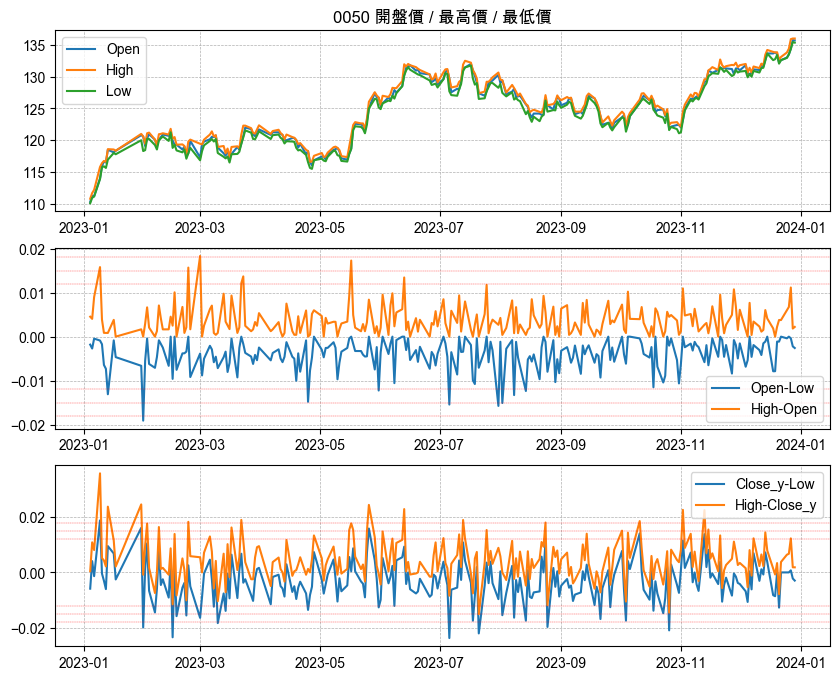

In [40]:
fig, (ax, ax2, ax3)  = plt.subplots(nrows=3, figsize=(10,8), sharex=False)

ax.plot(df[['Open', 'High', 'Low']])
ax.legend(['Open', 'High', 'Low'])
ax.grid(linestyle='--', linewidth=0.5)
ax.set_title(stock + ' 開盤價 / 最高價 / 最低價')

ax2.plot(df[['Open-Low', 'High-Open']])
ax2.legend(['Open-Low', 'High-Open'])
ax2.grid(linestyle='--', linewidth=0.5)
ax2.axhline(y=0.012, color='r', linestyle='--', linewidth=0.25)
ax2.axhline(y=0.015, color='r', linestyle='--', linewidth=0.25)
ax2.axhline(y=0.018, color='r', linestyle='--', linewidth=0.25)
ax2.axhline(y=-0.012, color='r', linestyle='--', linewidth=0.25)
ax2.axhline(y=-0.015, color='r', linestyle='--', linewidth=0.25)
ax2.axhline(y=-0.018, color='r', linestyle='--', linewidth=0.25)

ax3.plot(df[['Close_y-Low', 'High-Close_y']])
ax3.legend(['Close_y-Low', 'High-Close_y'])
ax3.grid(linestyle='--', linewidth=0.5)
ax3.axhline(y=0.012, color='r', linestyle='--', linewidth=0.25)
ax3.axhline(y=0.015, color='r', linestyle='--', linewidth=0.25)
ax3.axhline(y=0.018, color='r', linestyle='--', linewidth=0.25)
ax3.axhline(y=-0.012, color='r', linestyle='--', linewidth=0.25)
ax3.axhline(y=-0.015, color='r', linestyle='--', linewidth=0.25)
ax3.axhline(y=-0.018, color='r', linestyle='--', linewidth=0.25)

plt.show()

In [41]:
# 開盤價 相對 當日最高價/最低價 n% 之天數
print("Days Open-Low < 1.2%: " + str(df[df['Open-Low']<=-0.012].count()[0]),
      "\nDays Open-Low < 1.5%: " + str(df[df['Open-Low']<=-0.015].count()[0]),
      "\nDays Open-Low < 1.8%: " + str(df[df['Open-Low']<=-0.018].count()[0]),
      "\nDays High-Open > 1.2%: " + str(df[df['High-Open']>=0.012].count()[0]),
      "\nDays High-Open > 1.5%: " + str(df[df['High-Open']>=0.015].count()[0]),
      "\nDays High-Open > 1.8%: " + str(df[df['High-Open']>=0.018].count()[0])
      )

Days Open-Low < 1.2%: 9 
Days Open-Low < 1.5%: 4 
Days Open-Low < 1.8%: 1 
Days High-Open > 1.2%: 7 
Days High-Open > 1.5%: 4 
Days High-Open > 1.8%: 1


In [42]:
# 昨日收盤價 相對 當日最高價/最低價 n% 之天數
print("Days Close_y-Low < 1.2%: " + str(df[df['Close_y-Low']<-0.012].count()[0]),
      "\nDays Close_y-Low < 1.5%: " + str(df[df['Close_y-Low']<-0.015].count()[0]),
      "\nDays Close_y-Low < 1.8%: " + str(df[df['Close_y-Low']<-0.018].count()[0]),
      "\nDays High-Close_y > 1.2%: " + str(df[df['High-Close_y']>0.012].count()[0]),
      "\nDays High-Close_y > 1.5%: " + str(df[df['High-Close_y']>0.015].count()[0]),
      "\nDays High-Close_y > 1.8%: " + str(df[df['High-Close_y']>0.018].count()[0])
      )
# 合理:因為晚上美股對台股影響很大，所以盤前交易導致當日開盤跟昨日收盤價差異大

Days Close_y-Low < 1.2%: 26 
Days Close_y-Low < 1.5%: 16 
Days Close_y-Low < 1.8%: 7 
Days High-Close_y > 1.2%: 38 
Days High-Close_y > 1.5%: 21 
Days High-Close_y > 1.8%: 12


In [43]:
# tick規則
def tick_rule(price):
    if price < 10:
        tick = 0.01
    elif price < 50:
        tick = 0.05
    elif price < 100:
        tick = 0.1
    elif price < 500:
        tick = 0.5
    elif price < 1000:
        tick = 1
    else:
        tick = 5
    return tick

In [44]:
# 價格換算百分比
# Round the percentage up/down to buy/sell to the nearest tick
def pct2tick(close_y, pct):
    target = close_y * (1 + pct/100)
    tick = tick_rule(target)
    price = round(round(target/tick) * tick, 2)
    return price

In [45]:
# Now the key is in percentage, and value is still the number of stock to buy/sell
test_strat2 = {1.2:1, 1.5:1, 1.8:2, -1.2:1, -1.5:1, -1.8:2}
test_strat2

{1.2: 1, 1.5: 1, 1.8: 2, -1.2: 1, -1.5: 1, -1.8: 2}

In [46]:
# 把絕對數值改成比例
def criteria(close_y, hold, fee_rate, tax_rate, up, down, buy_, sell_, bal, fee_, tax_, dic_criteria):

    new_dict = {}
    for key, value in dic_criteria.items():
        newkey = pct2tick(close_y, key)
        new_dict[newkey - close_y] = value

    for key, value in new_dict.items():
        if key < 0:                                                 #key為負數
            if down >= -key:                                        #跌2.5塊，買1張
                buy_ += value
                hold += value
                fee_ += value * (close_y + key) * 1000 * fee_rate
                bal -= value * (close_y + key) * 1000               #花費$(close_y+key)買1張=1000股
                #print('down', 'buy '+str(buy_)+'at $'+str(close_y + key), ',hold '+str(hold), ',bal '+str(bal), ',fee '+str(fee_))
        if key > 0:                                                 #key為正數
            if up >= key:                                           #漲2.5塊，賣1張
                sell_ += min(hold, value)
                fee_ += min(hold, value) * (close_y + key) * 1000 * fee_rate
                tax_ += min(hold, value) * (close_y + key) * 1000 * tax_rate
                bal += min(hold, value) * (close_y + key) * 1000    #$(close_y+2.5)賣1張=1000股
                hold -= min(hold, value)
                #print('up,', 'sell '+str(sell_)+'at $'+str(close_y + key), ',hold '+str(hold), ',bal '+str(bal), ',fee '+str(fee_))

    return hold, buy_, sell_, bal, fee_, tax_

In [47]:
def strat04(data, init_holding, init_balance, fee_discount, strat):
    df = data
    # 初始持有證券價值
    init_value = init_holding * df.iloc[0,:]['Close'] * 1000
    # 初始持有張數
    holding = [init_holding]
    # 初始資金
    balance = [init_balance]
    # 交易手續費(買、賣價各0.1425%)
    fee_rate = 0.001425 * fee_discount
    # 證交稅(賣出價格0.3%)
    tax_rate = 0.003

    buy, sell, profit, fee, tax, expense, close_value, balance_total  = [], [], [], [], [], [], [], []
    cum_transaction = [0]
    cum_expense = [0]

    for date in df.index:
        #一些變數設置
        hold = holding[-1]
        bal = balance[-1]
        buy_, sell_, fee_, tax_, exp_ = [0, 0, 0, 0, 0]
        high = df.loc[date, 'High']
        close_y = df.loc[date, 'Close_y']
        low = df.loc[date, 'Low']
        up =  high - close_y
        down = close_y - low

        # 執行分析
        analysis = criteria(close_y, hold, fee_rate, tax_rate, up, down, buy_, sell_, bal, fee_, tax_, strat)
        hold, buy_, sell_, bal, fee_, tax_ = analysis[0:6]

        close_val = df.loc[date, 'Close'] * hold * 1000         #計算當日持有股票價值
        trans = buy_ + sell_                                    #計算當日交易量
        exp_ = fee_ + tax_
        bal -= exp_
        bal_tot = bal + close_val
        prof = bal_tot - init_balance - init_value              #計算累積利潤

        # 數據回填
        holding.append(hold)
        balance.append(bal)
        buy.append(buy_)
        sell.append(sell_)
        cum_transaction.append(cum_transaction[-1]+trans)
        close_value.append(close_val)
        fee.append(fee_)
        tax.append(tax_)
        expense.append(exp_)
        cum_expense.append(cum_expense[-1]+exp_)
        balance_total.append(bal_tot)
        profit.append(prof)
        

    holding = holding[1:]
    balance = balance[1:]
    cum_transaction = cum_transaction[1:]
    cum_expense = cum_expense[1:]

    output = pd.DataFrame(data={'持有股數':holding, '買入':buy, '賣出':sell, '累計交易量': cum_transaction, '收盤價':df['Close'], 
                              '交易手續費': fee, '證交稅': tax, '當日交易成本': expense, '累計交易成本': cum_expense, 
                              '帳戶餘額':balance, '持股收盤價值': close_value, '帳戶總值':balance_total, '帳戶盈虧': profit}, index=df.index)
    output['Index Daily Return (%)'] = df['Return']
    output['Strategy Daily Return (%)'] = output['帳戶總值'].pct_change()
    output.loc[data.index[0], 'Strategy Daily Return (%)'] = (output.loc[data.index[0], '帳戶總值'] / (init_balance + init_value) - 1)
    output['Index Total Return (%)'] = ((1 + output['Index Daily Return (%)']).cumprod() - 1)
    output['Strategy Total Return (%)'] = ((1 + output['Strategy Daily Return (%)']).cumprod() - 1)
    output = output.round(2)
    
    return output

In [48]:
strategy04 = strat04(df, 0, 1000000, 1, test_strat2)
strategy04

,持有股數,買入,賣出,累計交易量,收盤價,交易手續費,證交稅,當日交易成本,累計交易成本,帳戶餘額,持股收盤價值,帳戶總值,帳戶盈虧,Index Daily Return (%),Strategy Daily Return (%),Index Total Return (%),Strategy Total Return (%)
2023-01-04,0,0,0,0,110.50,0.0,0.0,0.0,0.00,1000000.00,0.0,1000000.00,0.00,-0.00,0.00,-0.00,0.00
2023-01-05,0,0,0,0,111.30,0.0,0.0,0.0,0.00,1000000.00,0.0,1000000.00,0.00,0.01,0.00,0.00,0.00
2023-01-06,0,0,0,0,111.80,0.0,0.0,0.0,0.00,1000000.00,0.0,1000000.00,0.00,0.00,0.00,0.01,0.00
2023-01-09,0,0,0,0,115.80,0.0,0.0,0.0,0.00,1000000.00,0.0,1000000.00,0.00,0.04,0.00,0.05,0.00
2023-01-10,0,0,0,0,116.25,0.0,0.0,0.0,0.00,1000000.00,0.0,1000000.00,0.00,0.00,0.00,0.05,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-25,5,0,0,95,133.50,0.0,0.0,0.0,33552.19,426947.81,667500.0,1094447.81,94447.81,0.00,0.00,0.21,0.09
2023-12-26,5,0,0,95,134.25,0.0,0.0,0.0,33552.19,426947.81,671250.0,1098197.81,98197.81,0.01,0.00,0.21,0.10
2023-12-27,5,0,0,95,135.75,0.0,0.0,0.0,33552.19,426947.81,678750.0,1105697.81,105697.81,0.01,0.01,0.23,0.11
2023-12-28,5,0,0,95,135.75,0.0,0.0,0.0,33552.19,426947.81,678750.0,1105697.81,105697.81,0.00,0.00,0.23,0.11


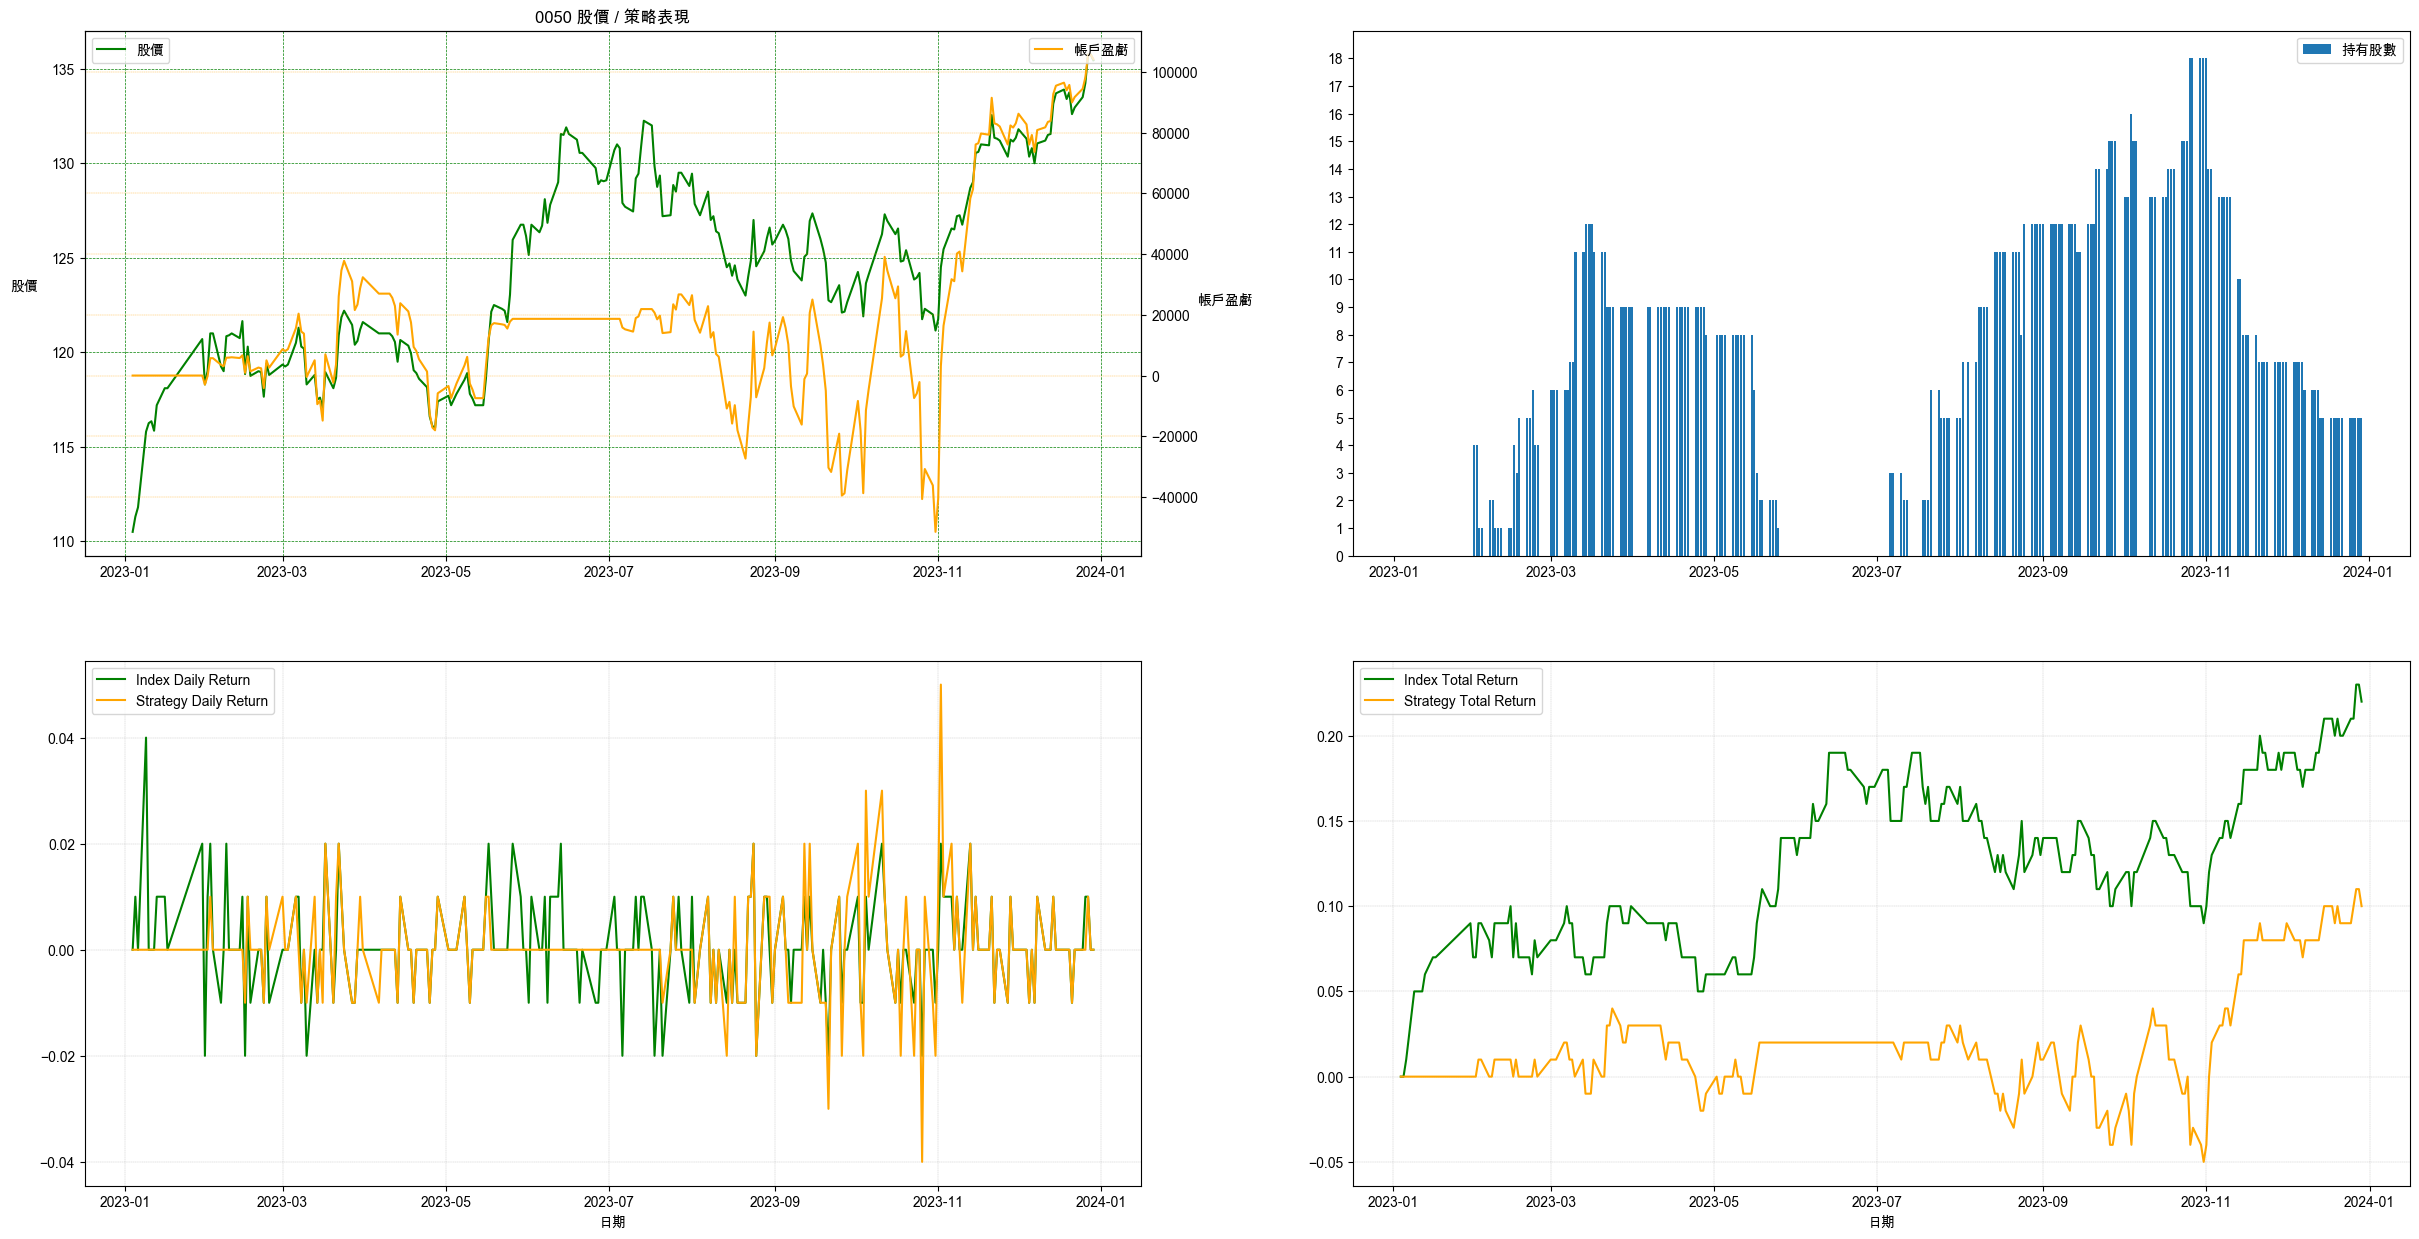

In [49]:
# 多張圖合併
fig, ax = plt.subplots(2, 2, figsize=(30,15), sharex=False)
ax[0,0].plot(df['Close'], color='green')
ax[0,0].set_title(stock+' 股價 / 策略表現')
ax[0,0].set_ylabel('股價', rotation=0, labelpad=20)
ax[0,0].grid(color='green', linestyle='--', linewidth=0.5)
ax[0,0].legend(['股價'], loc=2)

ax2 = ax[0,0].twinx()
ax2.plot(strategy04['帳戶盈虧'], color='orange')
ax2.set_ylabel('帳戶盈虧', rotation=0, labelpad=20)
ax2.grid(color='orange', linestyle='--', linewidth=0.25)
ax2.legend(['帳戶盈虧'] ,loc=1)

ax[0,1].bar(x=strategy04.index, height=strategy04['持有股數'])
ax[0,1].set_yticks(range(0, max(strategy04['持有股數']+1)))
ax[0,1].legend(['持有股數'])
y_min = min([x for x in strategy04['持有股數'] if x != 0]) - 1
y_max = max(strategy04['持有股數']) + 1
ax[0,1].set_ylim(y_min, y_max)

ax[1,0].plot(strategy04['Index Daily Return (%)'], color='green')
ax[1,0].plot(strategy04['Strategy Daily Return (%)'], color='orange')
ax[1,0].legend(['Index Daily Return', 'Strategy Daily Return'], loc=2)
ax[1,0].grid(linestyle='--', linewidth=0.25)
ax[1,0].set_xlabel('日期')

ax[1,1].plot(strategy04['Index Total Return (%)'], color='green')
ax[1,1].plot(strategy04['Strategy Total Return (%)'], color='orange')
ax[1,1].legend(['Index Total Return', 'Strategy Total Return'])
ax[1,1].grid(linestyle='--', linewidth=0.25)
ax[1,1].set_xlabel('日期')

# 調整圖片之間距離
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

### 分析(離群值正確性)

In [50]:
strategy04[strategy04['Strategy Daily Return (%)']>0.04]

,持有股數,買入,賣出,累計交易量,收盤價,交易手續費,證交稅,當日交易成本,累計交易成本,帳戶餘額,持股收盤價值,帳戶總值,帳戶盈虧,Index Daily Return (%),Strategy Daily Return (%),Index Total Return (%),Strategy Total Return (%)
2023-11-02,14,0,4,86,124.5,704.66,1483.5,2188.16,28366.09,-739866.09,1743000.0,1003133.91,3133.91,0.02,0.05,0.12,0.0


In [51]:
list1 = []
for i in strategy04[strategy04['Strategy Daily Return (%)']>0.04].index:
    list1.append(strategy04.index.get_loc(i)-1)
    list1.append(strategy04.index.get_loc(i))
    list1.append(strategy04.index.get_loc(i)+1)
list1

[195, 196, 197]

In [52]:
strategy04.iloc[list1,:]

,持有股數,買入,賣出,累計交易量,收盤價,交易手續費,證交稅,當日交易成本,累計交易成本,帳戶餘額,持股收盤價值,帳戶總值,帳戶盈虧,Index Daily Return (%),Strategy Daily Return (%),Index Total Return (%),Strategy Total Return (%)
2023-11-01,18,0,0,82,121.75,0.00,0.0,0.00,26177.92,-1232177.92,2191500.0,959322.08,-40677.93,0.00,0.01,0.10,-0.04
2023-11-02,14,0,4,86,124.50,704.66,1483.5,2188.16,28366.09,-739866.09,1743000.0,1003133.91,3133.91,0.02,0.05,0.12,0.00
2023-11-03,14,0,0,86,125.45,0.00,0.0,0.00,28366.09,-739866.09,1756300.0,1016433.91,16433.91,0.01,0.01,0.13,0.02


In [53]:
df.iloc[list1,:]

,成交股數,Open,High,Low,Close,Return,Close_y,Open-Low,High-Open,Close_y-Low,High-Close_y
2023-11-01,4851033,122.00,122.15,121.25,121.75,0.004953,121.15,-0.00615,0.00123,0.00083,0.00825
2023-11-02,10198429,123.15,124.50,123.15,124.50,0.022587,121.75,0.00000,0.01096,0.01150,0.02259
2023-11-03,9126443,125.00,125.60,124.70,125.45,0.007631,124.50,-0.00240,0.00480,0.00161,0.00884


### 所有交易

In [54]:
strategy04[(strategy04['買入']!=0) | (strategy04['賣出']!=0)]

,持有股數,買入,賣出,累計交易量,收盤價,交易手續費,證交稅,當日交易成本,累計交易成本,帳戶餘額,持股收盤價值,帳戶總值,帳戶盈虧,Index Daily Return (%),Strategy Daily Return (%),Index Total Return (%),Strategy Total Return (%)
2023-01-31,4,4,0,4,118.30,677.59,0.0,677.59,677.59,523822.41,473200.0,997022.41,-2977.59,-0.02,-0.00,0.07,-0.00
2023-02-02,1,0,3,7,121.00,516.56,1087.5,1604.06,2281.65,884718.35,121000.0,1005718.35,5718.35,0.02,0.01,0.09,0.01
2023-02-06,2,1,0,8,119.25,170.29,0.0,170.29,2451.94,765048.06,238500.0,1003548.06,3548.06,-0.01,-0.00,0.08,0.00
2023-02-08,1,0,1,9,120.85,171.71,361.5,533.21,2985.15,885014.85,120850.0,1005864.85,5864.85,0.02,0.00,0.09,0.01
2023-02-15,4,3,0,12,118.85,511.58,0.0,511.58,3496.72,525503.28,475400.0,1000903.28,903.28,-0.02,-0.01,0.07,0.00
2023-02-16,3,0,1,13,120.30,171.71,361.5,533.21,4029.94,645470.06,360900.0,1006370.06,6370.06,0.01,0.01,0.09,0.01
2023-02-17,5,2,0,15,118.75,338.44,0.0,338.44,4368.38,407631.62,593750.0,1001381.62,1381.62,-0.01,-0.00,0.07,0.00
2023-02-22,6,1,0,16,117.65,167.44,0.0,167.44,4535.81,289964.19,705900.0,995864.19,-4135.81,-0.01,-0.01,0.06,-0.00
2023-02-23,4,0,2,18,119.40,339.86,715.5,1055.36,5591.18,527408.82,477600.0,1005008.82,5008.82,0.01,0.01,0.08,0.01
2023-03-01,6,2,0,20,119.35,334.16,0.0,334.16,5925.34,292574.66,716100.0,1008674.66,8674.66,0.00,0.01,0.08,0.01


In [55]:
strategy04[strategy04['帳戶餘額']<0]

,持有股數,買入,賣出,累計交易量,收盤價,交易手續費,證交稅,當日交易成本,累計交易成本,帳戶餘額,持股收盤價值,帳戶總值,帳戶盈虧,Index Daily Return (%),Strategy Daily Return (%),Index Total Return (%),Strategy Total Return (%)
2023-03-10,11,4,0,25,118.30,674.74,0.0,674.74,6771.08,-301771.08,1301300.0,999528.92,-471.07,-0.02,-0.01,0.07,-0.00
2023-03-13,11,0,0,25,118.80,0.00,0.0,0.00,6771.08,-301771.08,1306800.0,1005028.92,5028.93,0.00,0.01,0.07,0.01
2023-03-14,12,1,0,26,117.50,167.44,0.0,167.44,6938.51,-419438.51,1410000.0,990561.49,-9438.51,-0.01,-0.01,0.06,-0.01
2023-03-15,12,0,0,26,117.60,0.00,0.0,0.00,6938.51,-419438.51,1411200.0,991761.49,-8238.51,0.00,0.00,0.06,-0.01
2023-03-16,12,0,0,26,117.05,0.00,0.0,0.00,6938.51,-419438.51,1404600.0,985161.49,-14838.51,-0.00,-0.01,0.06,-0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-08,13,0,0,87,127.20,0.00,0.0,0.00,28928.06,-613428.06,1653600.0,1040171.94,40171.94,0.01,0.01,0.15,0.04
2023-11-09,13,0,0,87,127.25,0.00,0.0,0.00,28928.06,-613428.06,1654250.0,1040821.94,40821.94,0.00,0.00,0.15,0.04
2023-11-10,13,0,0,87,126.75,0.00,0.0,0.00,28928.06,-613428.06,1647750.0,1034321.94,34321.94,-0.00,-0.01,0.14,0.03
2023-11-13,10,0,3,90,128.70,550.76,1159.5,1710.26,30638.32,-228638.32,1287000.0,1058361.68,58361.68,0.02,0.02,0.16,0.06
